In [1]:
import pandas as pd
import numpy as np
import sys
import os 

In [20]:
# first neural network with keras tutorial
from numpy import loadtxt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [9]:
## Load in Test Set
X_test_path = "X_test_enc.parquet"
X_test = pd.read_parquet(X_test_path)

y_test_path = "y_test.parquet"
y_test = pd.read_parquet(y_test_path)
y_test = pd.DataFrame(y_test['label'].astype(int)) ## convert labels to int for roc auc calculation

## Load in Validation Set
X_val_path = "X_val_enc.parquet"
X_val = pd.read_parquet(X_val_path)

y_val_path = "y_val.parquet"
y_val = pd.read_parquet(y_val_path)
y_val = pd.DataFrame(y_val['label'].astype(int))

y_train_path = "y_train.parquet"
y_train = pd.read_parquet(y_train_path)
y_train = pd.DataFrame(y_train['label'].astype(int))

In [10]:
## define columns to drop
cols_to_drop_25 = ['dwelling_time_-1_50', 'dwelling_time_-1_75', 'dwelling_time_-1_mean', 'std_-1_50', 'std_-1_75', 'std_-1_mean', 'mean_-1_50', 'mean_-1_75', 'mean_-1_mean',
                'dwelling_time_0_50', 'dwelling_time_0_75', 'dwelling_time_0_mean', 'std_0_50', 'std_0_75', 'std_0_mean', 'mean_0_50', 'mean_0_75', 'mean_0_mean',
                'dwelling_time_+1_50', 'dwelling_time_+1_75', 'dwelling_time_+1_mean', 'std_+1_50', 'std_+1_75', 'std_+1_mean', 'mean_+1_50', 'mean_+1_75', 'mean_+1_mean']

## dropping columns from X_validation set
X_val_25 = X_val.drop(columns = cols_to_drop_25, axis = 1)

## dropping columns from X_test set
X_test_25 = X_test.drop(columns = cols_to_drop_25, axis = 1)

## Load X_train_25
X_train_25_path = "X_train_25.parquet" ## to edit file path
X_train_25 = pd.read_parquet(X_train_25_path)

In [2]:
X_train_25 = pd.read_parquet("X_train_25.parquet")

In [11]:
X_train_25.shape

(30406, 38)

In [12]:
X_train_25.head()

,reads_count,dwelling_time_-1_25,std_-1_25,mean_-1_25,dwelling_time_0_25,std_0_25,mean_0_25,dwelling_time_+1_25,std_+1_25,mean_+1_25,...,position_4_G,position_4_T,position_5_A,position_5_C,position_5_G,position_5_T,position_6_A,position_6_C,position_6_G,position_6_T
0,0.012435,0.232362,0.151012,0.480287,0.112903,0.177553,0.178536,0.242053,0.087376,0.522642,...,0,0,0,1,0,0,0,0,0,1
1,0.023834,0.167178,0.098988,0.713262,0.197793,0.350040,0.653962,0.170199,0.137391,0.254717,...,0,0,0,1,0,0,0,0,0,1
2,0.003109,0.055215,0.066929,0.159498,0.169779,0.076513,0.131394,0.280795,0.090389,0.571698,...,0,0,1,0,0,0,1,0,0,0
3,0.025907,0.224949,0.187852,0.498208,0.123939,0.503599,0.653962,0.205298,0.083158,0.441509,...,0,0,1,0,0,0,0,0,0,1
4,0.003109,0.072086,0.043870,0.340502,0.223684,0.086110,0.423270,0.286755,0.112082,0.884906,...,0,0,0,0,0,1,0,0,0,1


In [5]:
X_train_50 = pd.read_parquet("X_train_50.parquet")

In [6]:
X_train_75 = pd.read_parquet("X_train_75.parquet")

In [7]:
X_train_enc = pd.read_parquet("X_train_enc.parquet")

In [11]:
X_train_enc.head()

,reads_count,dwelling_time_-1_25,dwelling_time_-1_50,dwelling_time_-1_75,dwelling_time_-1_mean,std_-1_25,std_-1_50,std_-1_75,std_-1_mean,mean_-1_25,...,position_4_G,position_4_T,position_5_A,position_5_C,position_5_G,position_5_T,position_6_A,position_6_C,position_6_G,position_6_T
0,0.129534,0.120861,0.161755,0.118185,0.142949,0.052662,0.044717,0.056730,0.047753,0.248239,...,0,0,0,0,0,1,0,0,1,0
1,0.017617,0.183775,0.332419,0.212733,0.300834,0.091375,0.126290,0.150513,0.124316,0.454225,...,0,0,0,1,0,0,1,0,0,0
2,0.011399,0.293874,0.444825,0.470246,0.495100,0.196698,0.167568,0.139627,0.164666,0.489437,...,0,0,0,1,0,0,0,0,0,1
3,0.009326,0.192053,0.227553,0.161421,0.198406,0.135781,0.126290,0.193218,0.181042,0.471831,...,0,0,0,1,0,0,1,0,0,0
4,0.023834,0.151490,0.227553,0.244328,0.257482,0.247367,0.219656,0.213732,0.235496,0.436620,...,0,0,1,0,0,0,0,0,1,0


In [6]:
y_train = pd.read_parquet("y_train.parquet")

In [7]:
y_train.value_counts()

label
0        35308
1         6002
dtype: int64

In [21]:
scaler_min_max = MinMaxScaler()

X_train = scaler_min_max.fit_transform(X_train_25)
X_test = scaler_min_max.transform(X_test_25)
X_val = scaler_min_max.transform(X_val_25)

In [46]:
X_train.shape

(30406, 38)

In [47]:
y_train.shape

(30406, 1)

In [55]:
X_val.shape

(12143, 38)

In [56]:
y_val.shape

(12143, 1)

In [23]:
model = Sequential()
model.add(Dense(12, input_shape=(38,), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['AUC','accuracy'])
model.fit(X_train, y_train, epochs=150, batch_size=10)

Epoch 1/150
3041/3041 [==============================] - 3s 866us/step - loss: 0.3584 - auc: 0.8323 - accuracy: 0.8381
Epoch 2/150
3041/3041 [==============================] - 3s 845us/step - loss: 0.3215 - auc: 0.8695 - accuracy: 0.8637
Epoch 3/150
3041/3041 [==============================] - 3s 871us/step - loss: 0.2998 - auc: 0.8865 - accuracy: 0.8769
Epoch 4/150
3041/3041 [==============================] - 3s 892us/step - loss: 0.2900 - auc: 0.8930 - accuracy: 0.8827
Epoch 5/150
3041/3041 [==============================] - 4s 1ms/step - loss: 0.2851 - auc: 0.8964 - accuracy: 0.8858
Epoch 6/150
3041/3041 [==============================] - 4s 1ms/step - loss: 0.2817 - auc: 0.8989 - accuracy: 0.8880
Epoch 7/150
3041/3041 [==============================] - 3s 1ms/step - loss: 0.2799 - auc: 0.9005 - accuracy: 0.8892
Epoch 8/150
3041/3041 [==============================] - 3s 1ms/step - loss: 0.2790 - auc: 0.9009 - accuracy: 0.8897
Epoch 9/150
3041/3041 [==============================] -

3041/3041 [==============================] - 14s 5ms/step - loss: 0.2547 - auc: 0.9204 - accuracy: 0.8996
Epoch 70/150
3041/3041 [==============================] - 13s 4ms/step - loss: 0.2547 - auc: 0.9205 - accuracy: 0.8989
Epoch 71/150
3041/3041 [==============================] - 13s 4ms/step - loss: 0.2547 - auc: 0.9204 - accuracy: 0.9010
Epoch 72/150
3041/3041 [==============================] - 11s 3ms/step - loss: 0.2541 - auc: 0.9207 - accuracy: 0.8999
Epoch 73/150
3041/3041 [==============================] - 10s 3ms/step - loss: 0.2536 - auc: 0.9212 - accuracy: 0.9005
Epoch 74/150
3041/3041 [==============================] - 9s 3ms/step - loss: 0.2544 - auc: 0.9208 - accuracy: 0.8992
Epoch 75/150
3041/3041 [==============================] - 9s 3ms/step - loss: 0.2537 - auc: 0.9215 - accuracy: 0.9004
Epoch 76/150
3041/3041 [==============================] - 9s 3ms/step - loss: 0.2541 - auc: 0.9207 - accuracy: 0.9002
Epoch 77/150
3041/3041 [==============================] - 8s 3ms

3041/3041 [==============================] - 6s 2ms/step - loss: 0.2498 - auc: 0.9238 - accuracy: 0.9008
Epoch 139/150
3041/3041 [==============================] - 6s 2ms/step - loss: 0.2496 - auc: 0.9242 - accuracy: 0.9017
Epoch 140/150
3041/3041 [==============================] - 6s 2ms/step - loss: 0.2494 - auc: 0.9241 - accuracy: 0.9016
Epoch 141/150
3041/3041 [==============================] - 6s 2ms/step - loss: 0.2491 - auc: 0.9246 - accuracy: 0.9016
Epoch 142/150
3041/3041 [==============================] - 6s 2ms/step - loss: 0.2493 - auc: 0.9244 - accuracy: 0.9011
Epoch 143/150
3041/3041 [==============================] - 6s 2ms/step - loss: 0.2496 - auc: 0.9241 - accuracy: 0.9011
Epoch 144/150
3041/3041 [==============================] - 6s 2ms/step - loss: 0.2489 - auc: 0.9248 - accuracy: 0.9017
Epoch 145/150
3041/3041 [==============================] - 6s 2ms/step - loss: 0.2492 - auc: 0.9245 - accuracy: 0.9021
Epoch 146/150
3041/3041 [==============================] - 6s 

In [26]:
model.predict(X_test)

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [28]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve, auc
import matplotlib.pyplot as plt

In [29]:
#y_val_pred = model.predict_proba(X_test)[:,1]
y_test_pred_proba = model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_proba)
logreg_roc_auc = roc_auc_score(y_test, y_test_pred_proba)

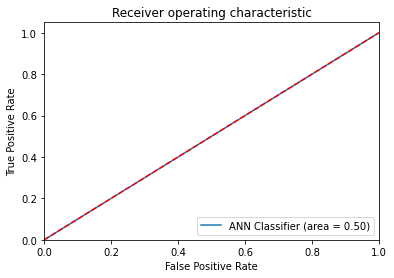

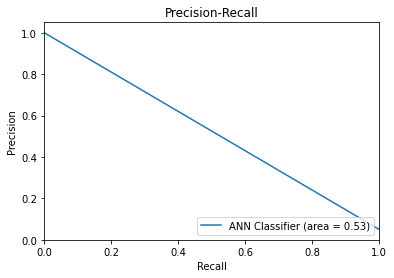

In [30]:
## create roc curve   
plt.figure()
plt.plot(fpr, tpr, label = 'ANN Classifier (area = %0.2f)' % logreg_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc = "lower right")
plt.show()

## define metric for precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, y_test_pred_proba)
auc_precision_recall = auc(recall, precision)

## create pr curve   
plt.figure()
plt.plot(recall, precision, label = 'ANN Classifier (area = %0.2f)' % auc_precision_recall)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall')
plt.legend(loc = "lower right")
plt.show()

In [32]:
from sklearn.metrics import roc_curve
y_pred_keras = model.predict(X_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)

In [33]:
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)

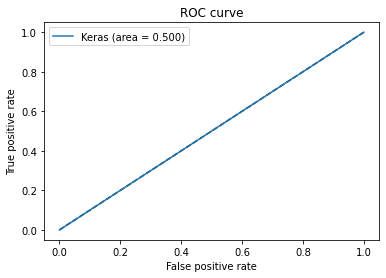

In [37]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adadelta, Adagrad, Adamax, Nadam, Ftrl
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.wrappers.scikit_learn import KerasClassifier
from math import floor
from sklearn.metrics import make_scorer, accuracy_score
from bayes_opt import BayesianOptimization
from sklearn.model_selection import StratifiedKFold
from keras.layers import LeakyReLU
LeakyReLU = LeakyReLU(alpha=0.1)
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", None)

In [43]:
score_acc = make_scorer(accuracy_score)

In [49]:
def nn_cl_bo(neurons, activation, optimizer, learning_rate,  batch_size, epochs ):
    optimizerL = ['SGD', 'Adam', 'RMSprop', 'Adadelta', 'Adagrad', 'Adamax', 'Nadam', 'Ftrl','SGD']
    optimizerD= {'Adam':Adam(lr=learning_rate), 'SGD':SGD(lr=learning_rate),
                 'RMSprop':RMSprop(lr=learning_rate), 'Adadelta':Adadelta(lr=learning_rate),
                 'Adagrad':Adagrad(lr=learning_rate), 'Adamax':Adamax(lr=learning_rate),
                 'Nadam':Nadam(lr=learning_rate), 'Ftrl':Ftrl(lr=learning_rate)}
    activationL = ['relu', 'sigmoid', 'softplus', 'softsign', 'tanh', 'selu',
                   'elu', 'exponential', LeakyReLU,'relu']
    neurons = round(neurons)
    activation = activationL[round(activation)]
    batch_size = round(batch_size)
    epochs = round(epochs)
    def nn_cl_fun():
        opt = Adam(lr = learning_rate)
        nn = Sequential()
        nn.add(Dense(neurons, input_dim=38, activation=activation))
        nn.add(Dense(neurons, activation=activation))
        nn.add(Dense(1, activation='sigmoid'))
        nn.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
        return nn
    es = EarlyStopping(monitor='accuracy', mode='max', verbose=0, patience=20)
    nn = KerasClassifier(build_fn=nn_cl_fun, epochs=epochs, batch_size=batch_size,
                         verbose=0)
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)
    score = cross_val_score(nn, X_train, y_train, scoring=score_acc, cv=kfold, fit_params={'callbacks':[es]}).mean()
    return score

In [50]:
params_nn ={
    'neurons': (10, 100),
    'activation':(0, 9),
    'optimizer':(0,7),
    'learning_rate':(0.01, 1),
    'batch_size':(200, 1000),
    'epochs':(20, 100)
}
# Run Bayesian Optimization
nn_bo = BayesianOptimization(nn_cl_bo, params_nn, random_state=111)
nn_bo.maximize(init_points=25, n_iter=4)

|   iter    |  target   | activa... | batch_... |  epochs   | learni... |  neurons  | optimizer |
-------------------------------------------------------------------------------------------------
|  1        |  0.8197   |  5.51     |  335.3    |  54.88    |  0.7716   |  36.58    |  1.044    |
|  2        |  0.8197   |  0.2023   |  536.2    |  39.09    |  0.3443   |  99.16    |  1.664    |
|  3        |  0.8197   |  0.7307   |  735.7    |  69.7     |  0.2815   |  51.96    |  0.8286   |
|  4        |  0.8197   |  0.6656   |  920.6    |  83.52    |  0.8422   |  83.37    |  6.937    |
|  5        |  0.8938   |  5.195    |  851.0    |  53.71    |  0.03717  |  50.87    |  0.7373   |
|  6        |  0.8197   |  7.355    |  758.2    |  65.22    |  0.2815   |  99.86    |  0.9663   |
|  7        |  0.8197   |  5.539    |  588.0    |  52.4     |  0.7306   |  39.05    |  2.804    |
|  8        |  0.8069   |  2.871    |  957.8    |  93.5     |  0.8157   |  13.07    |  6.604    |
|  9        |  0.832

In [51]:
params_nn_ = nn_bo.max['params']
activationL = ['relu', 'sigmoid', 'softplus', 'softsign', 'tanh', 'selu',
               'elu', 'exponential', LeakyReLU,'relu']
params_nn_['activation'] = activationL[round(params_nn_['activation'])]
params_nn_

{'activation': 'selu',
 'batch_size': 851.0135336291902,
 'epochs': 53.7054301919375,
 'learning_rate': 0.037173480215022196,
 'neurons': 50.872297884262295,
 'optimizer': 0.7372825972056519}

In [52]:
def nn_cl_bo2(neurons, activation, optimizer, learning_rate, batch_size, epochs,
              layers1, layers2, normalization, dropout, dropout_rate):
    optimizerL = ['SGD', 'Adam', 'RMSprop', 'Adadelta', 'Adagrad', 'Adamax', 'Nadam', 'Ftrl','SGD']
    optimizerD= {'Adam':Adam(lr=learning_rate), 'SGD':SGD(lr=learning_rate),
                 'RMSprop':RMSprop(lr=learning_rate), 'Adadelta':Adadelta(lr=learning_rate),
                 'Adagrad':Adagrad(lr=learning_rate), 'Adamax':Adamax(lr=learning_rate),
                 'Nadam':Nadam(lr=learning_rate), 'Ftrl':Ftrl(lr=learning_rate)}
    activationL = ['relu', 'sigmoid', 'softplus', 'softsign', 'tanh', 'selu',
                   'elu', 'exponential', LeakyReLU,'relu']
    neurons = round(neurons)
    activation = activationL[round(activation)]
    optimizer = optimizerD[optimizerL[round(optimizer)]]
    batch_size = round(batch_size)
    epochs = round(epochs)
    layers1 = round(layers1)
    layers2 = round(layers2)
    def nn_cl_fun():
        nn = Sequential()
        nn.add(Dense(neurons, input_dim=38, activation=activation))
        if normalization > 0.5:
            nn.add(BatchNormalization())
        for i in range(layers1):
            nn.add(Dense(neurons, activation=activation))
        if dropout > 0.5:
            nn.add(Dropout(dropout_rate, seed=123))
        for i in range(layers2):
            nn.add(Dense(neurons, activation=activation))
        nn.add(Dense(1, activation='sigmoid'))
        nn.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
        return nn
    es = EarlyStopping(monitor='accuracy', mode='max', verbose=0, patience=20)
    nn = KerasClassifier(build_fn=nn_cl_fun, epochs=epochs, batch_size=batch_size, verbose=0)
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)
    score = cross_val_score(nn, X_train, y_train, scoring=score_acc, cv=kfold, fit_params={'callbacks':[es]}).mean()
    return score

In [53]:
params_nn2 ={
    'neurons': (10, 100),
    'activation':(0, 9),
    'optimizer':(0,7),
    'learning_rate':(0.01, 1),
    'batch_size':(200, 1000),
    'epochs':(20, 100),
    'layers1':(1,3),
    'layers2':(1,3),
    'normalization':(0,1),
    'dropout':(0,1),
    'dropout_rate':(0,0.3)
}
# Run Bayesian Optimization
nn_bo = BayesianOptimization(nn_cl_bo2, params_nn2, random_state=111)
nn_bo.maximize(init_points=25, n_iter=4)

|   iter    |  target   | activa... | batch_... |  dropout  | dropou... |  epochs   |  layers1  |  layers2  | learni... |  neurons  | normal... | optimizer |
-------------------------------------------------------------------------------------------------------------------------------------------------------------
|  1        |  0.8197   |  5.51     |  335.3    |  0.4361   |  0.2308   |  43.63    |  1.298    |  1.045    |  0.426    |  31.48    |  0.3377   |  6.935    |
|  2        |  0.8197   |  2.14     |  265.0    |  0.6696   |  0.1864   |  41.94    |  1.932    |  1.237    |  0.08322  |  91.07    |  0.794    |  5.884    |
|  3        |  0.8197   |  7.337    |  992.8    |  0.5773   |  0.2441   |  53.71    |  1.055    |  1.908    |  0.1143   |  83.55    |  0.6977   |  3.957    |
|  4        |  0.8197   |  2.468    |  998.8    |  0.138    |  0.1846   |  58.8     |  1.81     |  2.456    |  0.3296   |  46.05    |  0.319    |  6.631    |
|  5        |  0.8928   |  8.268    |  851.1    |  0

In [54]:
params_nn_ = nn_bo.max['params']
learning_rate = params_nn_['learning_rate']
activationL = ['relu', 'sigmoid', 'softplus', 'softsign', 'tanh', 'selu',
               'elu', 'exponential', LeakyReLU,'relu']
params_nn_['activation'] = activationL[round(params_nn_['activation'])]
params_nn_['batch_size'] = round(params_nn_['batch_size'])
params_nn_['epochs'] = round(params_nn_['epochs'])
params_nn_['layers1'] = round(params_nn_['layers1'])
params_nn_['layers2'] = round(params_nn_['layers2'])
params_nn_['neurons'] = round(params_nn_['neurons'])
optimizerL = ['Adam', 'SGD', 'RMSprop', 'Adadelta', 'Adagrad', 'Adamax', 'Nadam', 'Ftrl','Adam']
optimizerD= {'Adam':Adam(lr=learning_rate), 'SGD':SGD(lr=learning_rate),
             'RMSprop':RMSprop(lr=learning_rate), 'Adadelta':Adadelta(lr=learning_rate),
             'Adagrad':Adagrad(lr=learning_rate), 'Adamax':Adamax(lr=learning_rate),
             'Nadam':Nadam(lr=learning_rate), 'Ftrl':Ftrl(lr=learning_rate)}
params_nn_['optimizer'] = optimizerD[optimizerL[round(params_nn_['optimizer'])]]
params_nn_

{'activation': <keras.layers.advanced_activations.LeakyReLU at 0x7fd908837d90>,
 'batch_size': 472,
 'dropout': 0.6528042918753562,
 'dropout_rate': 0.27754755457150737,
 'epochs': 50,
 'layers1': 3,
 'layers2': 3,
 'learning_rate': 0.6239763077652074,
 'neurons': 24,
 'normalization': 0.37491974612014767,
 'optimizer': <keras.optimizer_v2.adagrad.Adagrad at 0x7fd9028f5b50>}

In [58]:
# Fitting Neural Network
def nn_cl_fun():
    nn = Sequential()
    nn.add(Dense(params_nn_['neurons'], input_dim=38, activation=params_nn_['activation']))
    if params_nn_['normalization'] > 0.5:
        nn.add(BatchNormalization())
    for i in range(params_nn_['layers1']):
        nn.add(Dense(params_nn_['neurons'], activation=params_nn_['activation']))
    if params_nn_['dropout'] > 0.5:
        nn.add(Dropout(params_nn_['dropout_rate'], seed=123))
    for i in range(params_nn_['layers2']):
        nn.add(Dense(params_nn_['neurons'], activation=params_nn_['activation']))
    nn.add(Dense(1, activation=LeakyReLU))
    nn.compile(loss='binary_crossentropy', optimizer=params_nn_['optimizer'], metrics=['accuracy'])
    return nn
es = EarlyStopping(monitor='accuracy', mode='max', verbose=0, patience=20)
nn = KerasClassifier(build_fn=nn_cl_fun, epochs=params_nn_['epochs'], batch_size=params_nn_['batch_size'],
                         verbose=0)
nn.fit(X_train, y_train, validation_data=(X_val, y_val), verbose=1)

Epoch 1/50
65/65 [==============================] - 1s 5ms/step - loss: 12.3184 - accuracy: 0.1905 - val_loss: 14.4468 - val_accuracy: 0.0526
Epoch 2/50
65/65 [==============================] - 0s 3ms/step - loss: 12.4994 - accuracy: 0.1803 - val_loss: 14.4468 - val_accuracy: 0.0526
Epoch 3/50
65/65 [==============================] - 0s 3ms/step - loss: 12.4994 - accuracy: 0.1803 - val_loss: 14.4468 - val_accuracy: 0.0526
Epoch 4/50
65/65 [==============================] - 0s 3ms/step - loss: 12.4994 - accuracy: 0.1803 - val_loss: 14.4468 - val_accuracy: 0.0526
Epoch 5/50
65/65 [==============================] - 0s 3ms/step - loss: 12.4994 - accuracy: 0.1803 - val_loss: 14.4468 - val_accuracy: 0.0526
Epoch 6/50
65/65 [==============================] - 0s 3ms/step - loss: 12.4994 - accuracy: 0.1803 - val_loss: 14.4468 - val_accuracy: 0.0526
Epoch 7/50
65/65 [==============================] - 0s 3ms/step - loss: 12.4994 - accuracy: 0.1803 - val_loss: 14.4468 - val_accuracy: 0.0526
Epoch 

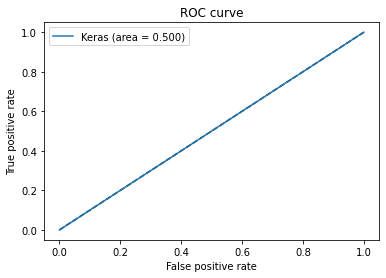

In [59]:
y_pred_keras = nn.predict(X_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)
auc_keras = auc(fpr_keras, tpr_keras)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()